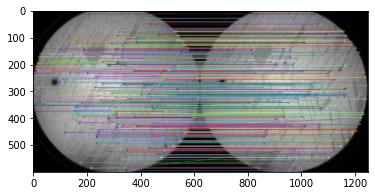

[[ 9.62589839e-01 -1.00064417e-02  9.52556638e+00]
 [-1.72231753e-02  9.60889440e-01  1.15636771e+01]
 [-3.75096722e-05 -2.05019032e-05  1.00000000e+00]]
[[ 9.99918074e-01 -1.79717552e-04  9.38773546e-02]
 [ 4.53222613e-04  1.00010900e+00 -3.71062152e-01]]
(2, 3)
(3, 3)
[[ 9.99836072e-01 -3.59439968e-04  1.87813705e-01]
 [ 9.06457493e-04  1.00021792e+00 -7.42122201e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [2]:
#%matplotlib ipympl
import cv2
import numpy as np
import matplotlib.pyplot as plt

from uspy.leem.base import LEEMImg


img = LEEMImg("../source/testdata/test_stack_ca/LEEMIV_third-ruo2-try_mC_200C_000_055.dat")
img2 = LEEMImg("../source/testdata/test_stack_ca/LEEMIV_third-ruo2-try_mC_200C_000_056.dat")
#img = LEEMImg("Stack/06_IV_020.dat")
#img2 = LEEMImg("Stack/06_IV_021.dat")
img8bit = cv2.normalize(img.data, None, 0, 255, cv2.NORM_MINMAX).astype('uint8') 
img8bit2 = cv2.normalize(img2.data, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img8bit, None)
keypoints2, descriptors2 = sift.detectAndCompute(img8bit2, None)

bf = cv2.BFMatcher()#, crossCheck=True)
matches = bf.knnMatch(descriptors, descriptors2, 2)

#matches = sorted(matches, key = lambda x:x.distance)

#FLANN_INDEX_KDTREE = 0
#index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#search_params = dict(checks=50)   # or pass empty dictionary

#flann = cv2.FlannBasedMatcher(index_params,search_params)
#matches = flann.knnMatch(descriptors,descriptors2,k=2)


image = cv2.drawKeypoints(img8bit, keypoints, img8bit)
image2 = cv2.drawKeypoints(img8bit2, keypoints2, img8bit2)
#image3 = cv2.drawMatches(img8bit, keypoints, img8bit2, keypoints2, matches, img8bit, flags=2)

#print(len(matches))

#print([match.distance for match in matches])
#j = 50
#print(matches[j].distance, matches[j].imgIdx, matches[j].queryIdx, matches[j].trainIdx)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
#print(type(good))
        

img3 = cv2.drawMatches(img8bit, keypoints, img8bit2, keypoints2, good, img8bit, flags=2)
#img3 = cv2.drawMatchesKnn(img8bit,keypoints,img8bit2,keypoints2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

        
if len(good) > 10:
    src_pts = np.array([ keypoints[m.queryIdx].pt for m in good ], dtype=np.float32).reshape(-1,1,2)
    dst_pts = np.array([ keypoints2[m.trainIdx].pt for m in good ], dtype=np.float32).reshape(-1,1,2)
    homo_warp, _ = cv2.findHomography(src_pts, dst_pts)
    print(homo_warp)
    rigid_warp = cv2.estimateRigidTransform(src_pts, dst_pts, True)
    print(rigid_warp)
    print(rigid_warp.shape)
    rigid_warp = np.append(rigid_warp, [[0, 0, 1]], axis=0)
    print(rigid_warp.shape)
    print(np.dot(rigid_warp, rigid_warp))

#fig, ax3 = plt.subplots(1, 1, figsize=(12, 8))
#ax1.imshow(image)
#ax2.imshow(image2)
#ax3.imshow(image3)